### Breakdown

In [1]:
cd ..

/home/astro/phrdhx/automated_exocomet_hunt


In [2]:
from analysis_tools_cython import *
import numpy as np

In [4]:
lc, info = import_XRPlightcurve('test_lightcurves/tesslc_7421463.pkl',sector=6,drop_bad_points=True,clip=4)
#lc, info = import_XRPlightcurve('/storage/astro2/phrdhx/tesslcs/tesslcs_sector_6_104/tesslcs_tmag_7_8/tesslc_7421463.pkl',sector=6,drop_bad_points=True,clip=4)
lc

time,raw flux,corrected flux,PCA flux,flux error,quality
float64,float64,float64,float64,float64,int32
1469.013325200033,188582.5823309048,189089.2919090808,188994.13538686393,12.173081785368371,0
1469.0341583747556,188633.21168976047,189188.62397550643,189076.0210964683,12.175219384514925,0
1469.0549915510487,188622.95572442672,189146.5931633682,189040.1609532017,12.177173153966292,0
1469.0758247288288,188641.91363525676,189086.54501620916,188999.37452427796,12.17482410019509,0
1469.0966579079811,188647.6225222559,189115.82015325598,189046.01953262568,12.175124490999428,0
1469.1174910883633,188657.45748233894,189114.02530752364,189050.42366131902,12.17590060245781,0
1469.1383242698043,188658.8280711864,189120.981251035,189041.08468594507,12.176052091682978,0
1469.159157452111,188730.62171916728,189094.69833204878,189022.96622712913,12.176969190591093,0
1469.17999063507,188709.23566760367,189160.35340958697,189098.61919241154,12.176207278243366,0


In [7]:
info

[7421463, 81.2022275719871, -42.43991707964649, 7.2335, 3, 3]

In [4]:
lc = lc['time', 'corrected flux','quality']
t, flux, quality, real = clean_data(lc)

In [5]:
timestep = calculate_timestep(lc)

In [6]:
factor = (1/48)/timestep

In [7]:
N = len(t)
ones = np.ones(N)
flux = normalise_flux(flux)

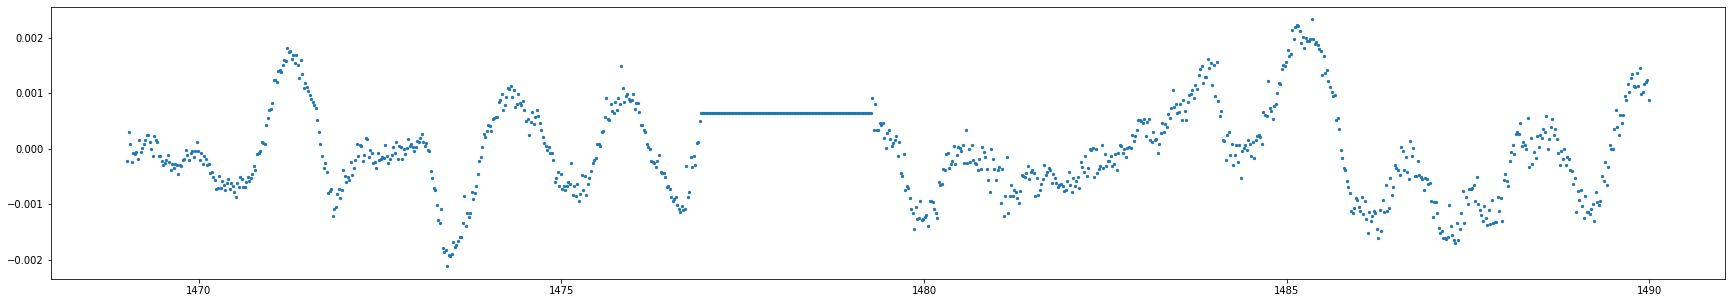

In [8]:
plt.figure(figsize=(30,5))
plt.scatter(t,flux,s=5)

---

In [9]:
flux_ls = np.copy(flux)

In [10]:
lombscargle_filter(t,flux_ls,real,0.08)

In [11]:
periodicnoise_ls = flux - flux_ls
flux_ls = flux_ls * real

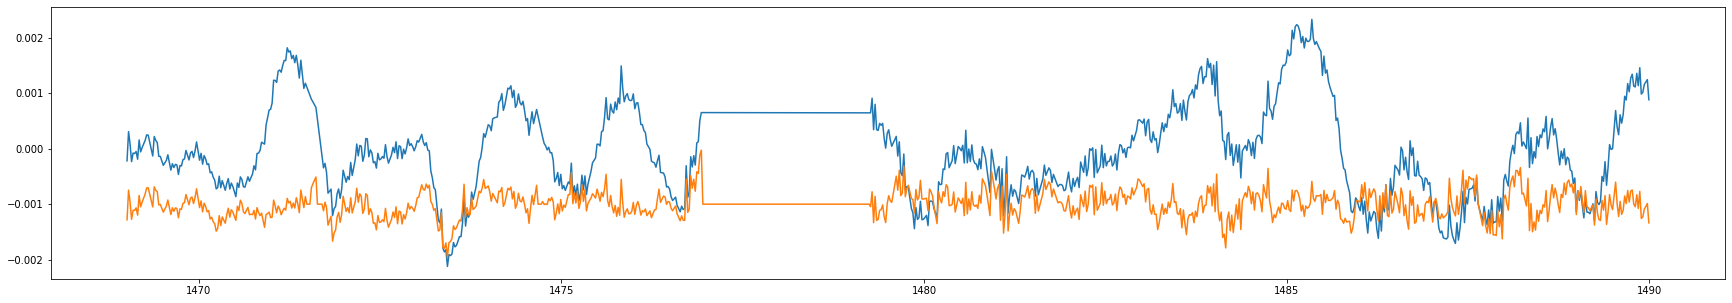

In [12]:
plt.figure(figsize=(30,5))
plt.plot(t,flux)
plt.plot(t,flux_ls-0.001)

---

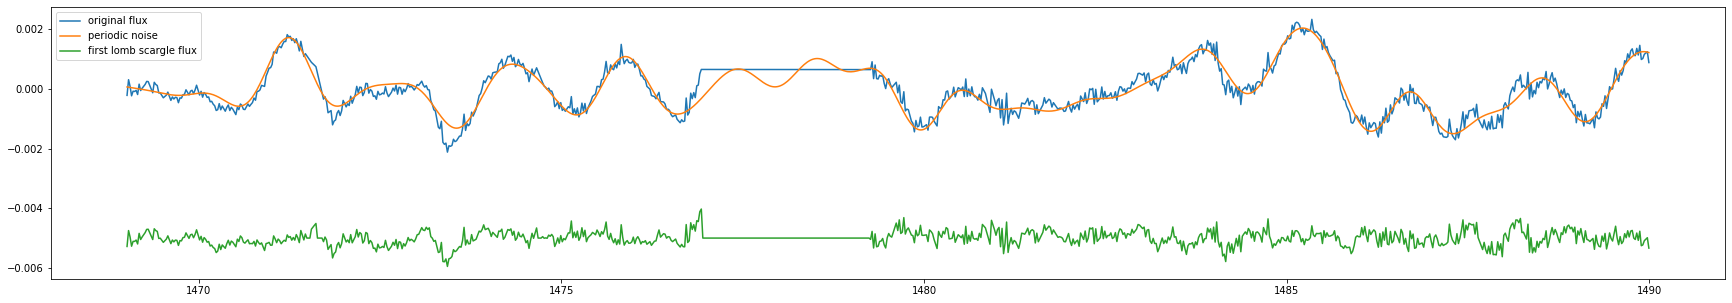

In [13]:
plt.figure(figsize=(30,5))
plt.plot(t, flux,label='original flux')
plt.plot(t,periodicnoise_ls,label='periodic noise')
plt.plot(t,flux_ls-0.005,label='first lomb scargle flux')
plt.legend()
plt.show()

In [14]:
T = test_statistic_array(flux_ls,60*factor)
data_nonzeroT = nonzero(T)

In [15]:
m, n = np.unravel_index(T.argmin(),T.shape)

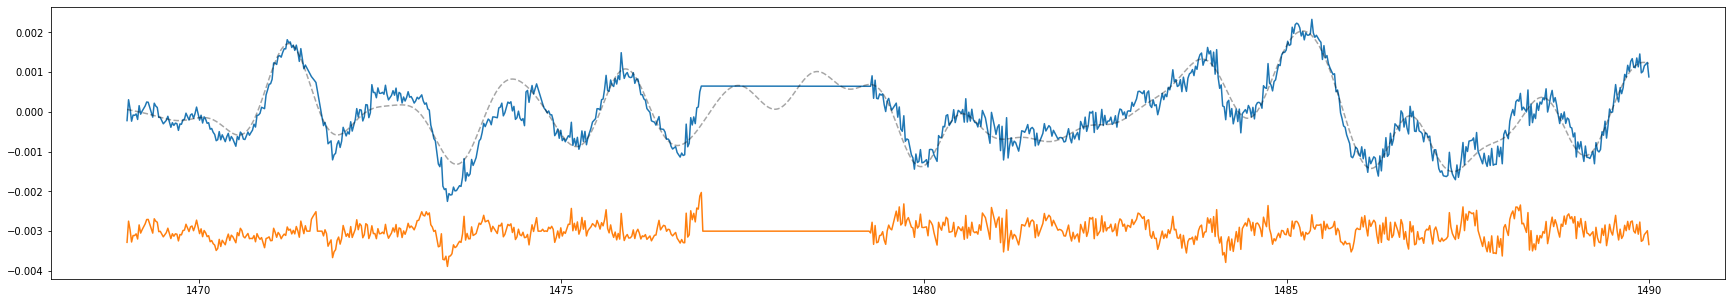

In [28]:
plt.figure(figsize=(30,5))
plt.plot(t,flux)
plt.plot(t,periodicnoise_ls,color='black',alpha=0.35,linestyle='--')
plt.plot(t,flux_ls-0.003)

In [29]:
asym = calc_shape(m, n, t, quality, flux)

In [30]:
classify(m, n, real, asym)

'maybeTransit'

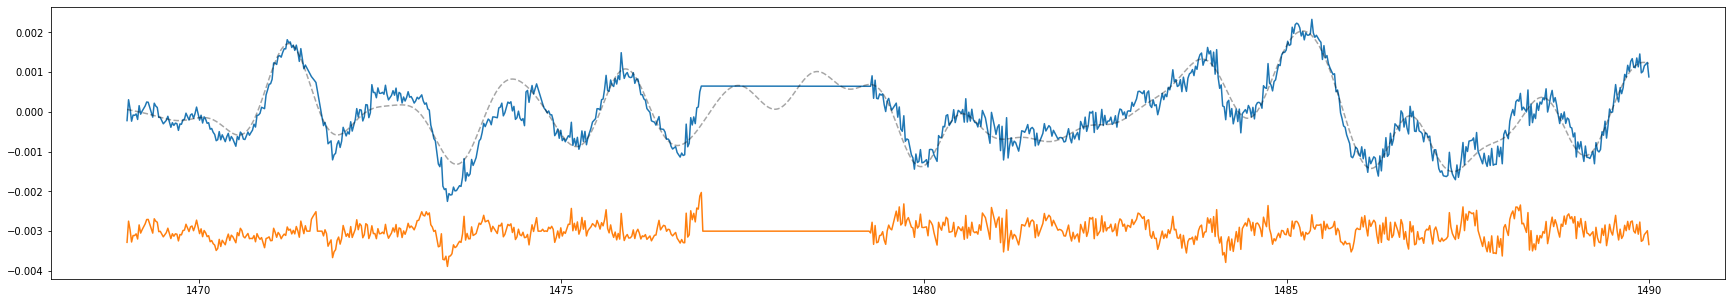

In [31]:
plt.figure(figsize=(30,5))
plt.plot(t,flux)
plt.plot(t,periodicnoise_ls,color='black',alpha=0.35,linestyle='--')
plt.plot(t,flux_ls-0.003)

---

In [23]:
masked_flux = np.copy(flux)
masked_flux[n - 2*math.ceil(n*timestep) : n + 2*math.ceil(n*timestep)] = 0

In [24]:
original_masked_flux = np.copy(masked_flux)

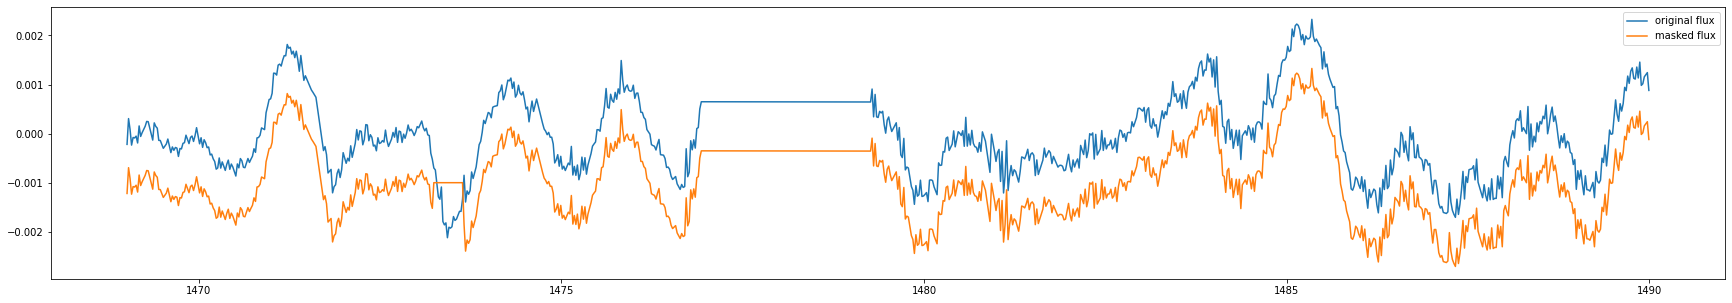

In [33]:
plt.figure(figsize=(30,5))
plt.plot(t,flux,label='original flux')
plt.plot(t,masked_flux-0.001,label='masked flux')
plt.legend()

In [34]:
lombscargle_filter(t, masked_flux, real, 0.08)

In [35]:
periodicnoise_ls2 = original_masked_flux - masked_flux


In [36]:
masked_flux = masked_flux * real
final_flux = flux - periodicnoise_ls2
final_flux = final_flux * real

[]

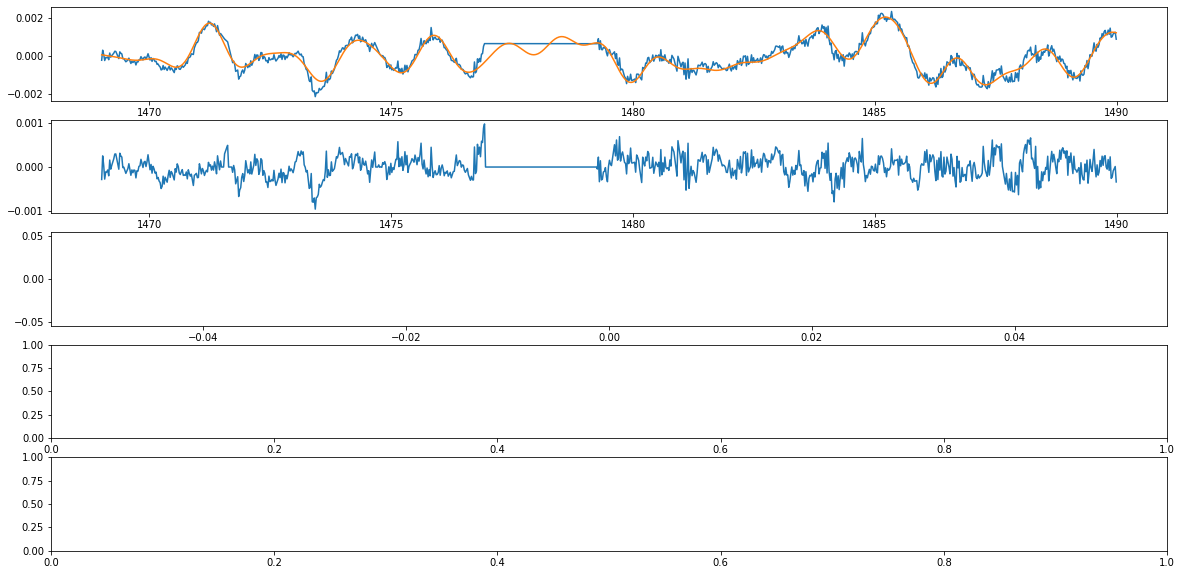

In [37]:
fig, ax = plt.subplots(5,figsize=(20,10))
ax[0].plot(t,flux)
ax[0].plot(t,periodicnoise_ls)
ax[1].plot(t,flux_ls)
ax[2].plot()

In [23]:
asym = calc_shape(m, n, t, quality, final_flux)

In [24]:
classify(m, n, real, asym)

'maybeTransit'

'tesslc_7421463.pkl -18.39988518 -6.5363475 1473.42995088 0.94079603 0.14113614 0.11766336 0.41666013 -0.00154282 maybeTransit'

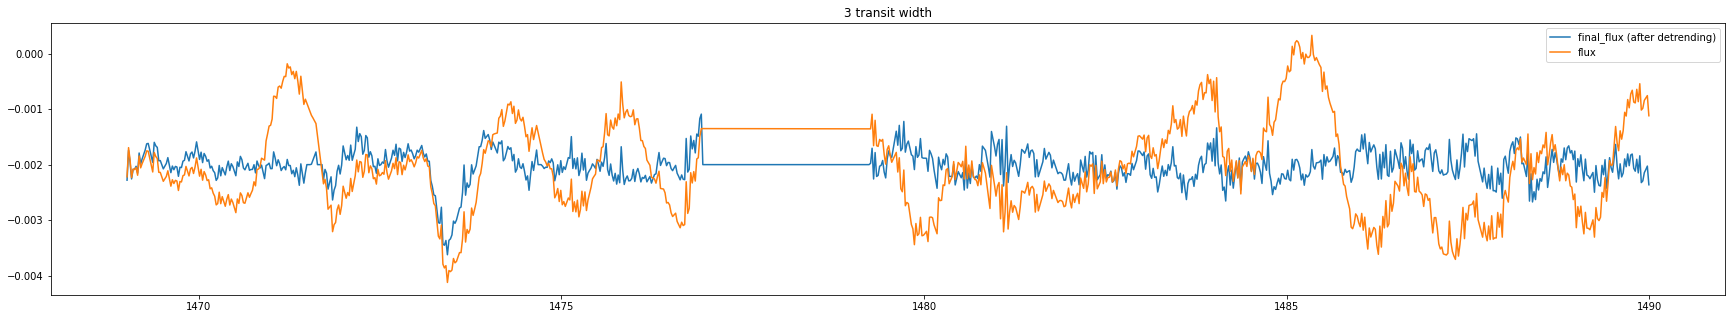

In [25]:
processing(lc,f_path='/storage/astro2/phrdhx/tesslcs/tesslcs_sector_6_104/tesslcs_tmag_7_8/tesslc_7421463.pkl')